In [17]:
import numpy as np 
import pandas as pd 

In [18]:
df = pd.read_csv(r'D:\Machine Learning\ML Projects\CampusX\Principle_Component_Analysis 2\train.csv')

In [19]:
df.shape

(42000, 785)

In [20]:
df.sample()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
40131      2       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
40131       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
40131         0         0         0         0         0  

[1 rows x 785 columns]

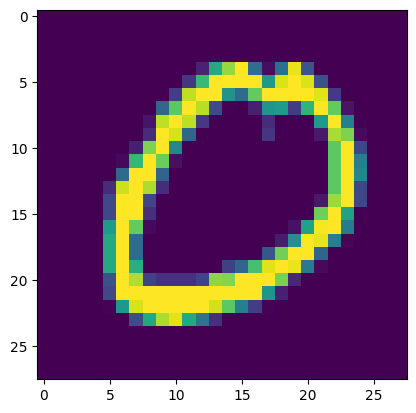

In [21]:
import matplotlib.pyplot as plt
plt.imshow(df.iloc[13051,1:].values.reshape(28,28))

In [22]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [24]:
X_train.shape

(33600, 784)

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
knn = KNeighborsClassifier()

In [29]:
# Fit the model with training data
knn.fit(X_train, y_train)

# Measure prediction time
import time
start = time.time()
y_pred = knn.predict(X_test)
print("Prediction time:", time.time() - start, "seconds")


Prediction time: 6.447267532348633 seconds


In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9648809523809524

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9648809523809524

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9648809523809524

In [33]:
# PCA 
from sklearn.decomposition import PCA
pca = PCA(n_components=200)

In [34]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [35]:
X_train_trf.shape

(33600, 200)

In [36]:
knn = KNeighborsClassifier()

In [37]:
knn.fit(X_train_trf,y_train)

KNeighborsClassifier()

In [38]:
accuracy_score(y_test,y_pred)

0.9648809523809524

In [40]:
for i in range(1,25):
    pca = PCA(n_components=i)
    X_train_trf = pca.fit_transform(X_train)
    X_test_trf = pca.transform(X_test)
    
    knn = KNeighborsClassifier()
    
    knn.fit(X_train_trf,y_train)
    
    y_pred = knn.predict(X_test_trf)
    
    print(accuracy_score(y_test,y_pred))

0.2730952380952381
0.42214285714285715
0.48488095238095236
0.6194047619047619
0.7297619047619047
0.8188095238095238
0.866904761904762
0.8938095238095238
0.9075
0.9247619047619048
0.9315476190476191
0.9421428571428572
0.9492857142857143
0.954047619047619
0.9544047619047619
0.9583333333333334
0.9616666666666667
0.9626190476190476
0.9644047619047619
0.9654761904761905
0.9665476190476191
0.9683333333333334
0.9694047619047619
0.9703571428571428


In [41]:
# transforming to a 2D coordinate system
pca = PCA(n_components=2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [42]:
X_train_trf

array([[-226.60523462, -305.89437099],
       [  38.33583717,  461.09152047],
       [-305.49225463,  351.67141678],
       ...,
       [ -28.00133402, -596.06287179],
       [ 233.97011308,  -18.64779077],
       [1096.50373629,  254.72333173]])

In [43]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(x=X_train_trf[:,0],
                 y=X_train_trf[:,1],
                 color=y_train_trf,
                 color_discrete_sequence=px.colors.qualitative.G10
                )
fig.show()

In [44]:
# transforming in 3D
pca = PCA(n_components=3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [45]:
X_train_trf

array([[-226.60523462, -305.89437099, -417.17563833],
       [  38.33583717,  461.09152047, -100.40840682],
       [-305.49225463,  351.67141678,  961.3475787 ],
       ...,
       [ -28.00133402, -596.06287179, -606.25130926],
       [ 233.97011308,  -18.64779077,  148.27481803],
       [1096.50373629,  254.72333173,  560.33354832]])

In [46]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=X_train_trf[:,0], y=X_train_trf[:,1], z=X_train_trf[:,2],
              color=y_train_trf)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

In [47]:
pca.explained_variance_
# Eigen values

array([335506.57620544, 244807.10511442, 212051.0345165 ])

In [48]:
pca.components_.shape
# Eigen vectors

(3, 784)

In [49]:
pca.explained_variance_ratio_

array([0.09770722, 0.07129345, 0.06175413])

In [50]:
pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [51]:
pca.explained_variance_.shape

(784,)

In [52]:
np.cumsum(pca.explained_variance_ratio_)

array([0.09770722, 0.16900067, 0.2307548 , 0.28465032, 0.33357585,
       0.37694429, 0.40971003, 0.43863706, 0.46634409, 0.4896358 ,
       0.51056687, 0.53103851, 0.54811645, 0.56494851, 0.58079573,
       0.59567555, 0.60890653, 0.6217459 , 0.63357974, 0.6450916 ,
       0.65585129, 0.66609344, 0.6757597 , 0.68493267, 0.69377981,
       0.70211509, 0.7102658 , 0.71801912, 0.72543898, 0.73237223,
       0.73898072, 0.74531281, 0.75134494, 0.75723224, 0.76285054,
       0.76824915, 0.77332825, 0.77819952, 0.78291205, 0.78755761,
       0.79208251, 0.7965231 , 0.80068828, 0.80464464, 0.80848068,
       0.81221196, 0.815819  , 0.81930765, 0.82264965, 0.82582976,
       0.82897181, 0.83204415, 0.83496782, 0.83783336, 0.84062454,
       0.84331783, 0.84596712, 0.84853351, 0.85106204, 0.85351457,
       0.85592008, 0.85831105, 0.86057999, 0.86279635, 0.8649424 ,
       0.86700054, 0.86901774, 0.87098082, 0.87291702, 0.87479944,
       0.87665559, 0.87847316, 0.88022525, 0.88195105, 0.88360